In [1]:
%tensorflow_version 2.x

import tensorflow as tf

print(tf.__version__)
print(tf.test.gpu_device_name())

TensorFlow 2.x selected.
2.1.0
/device:GPU:0


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


X_train: (20802, 64, 64, 3), y_train: (20802, 5)
X_test: (5201, 64, 64, 3), y_test: (5201, 5)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 64)        1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 128)       147584    
____________________________

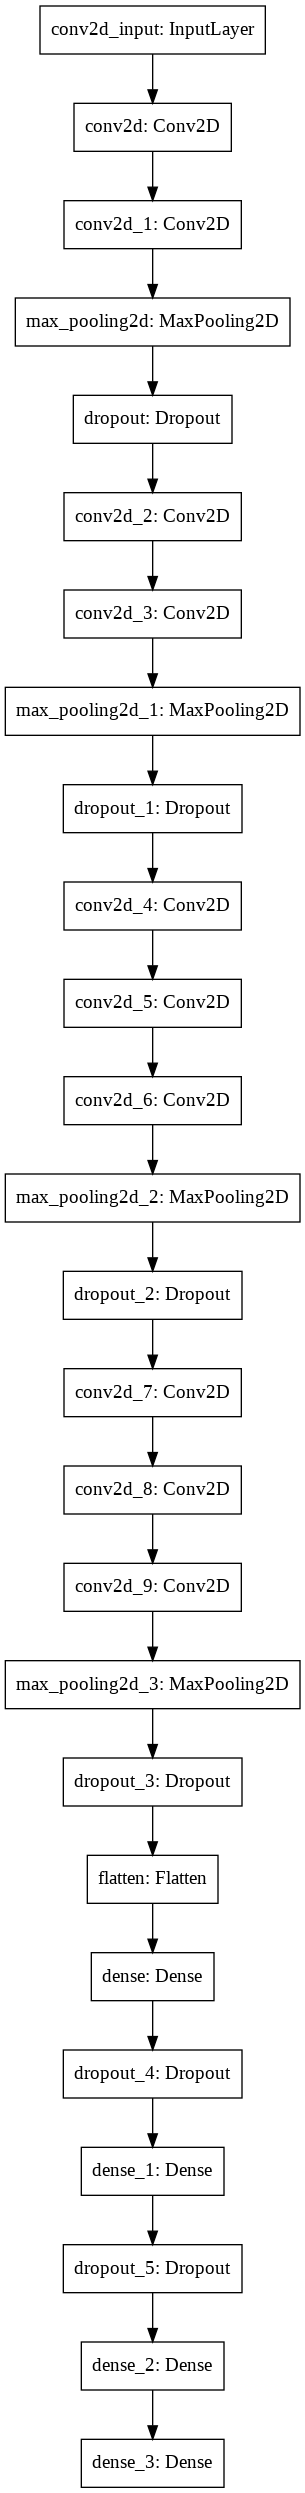

In [3]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import plot_model

#1 64x64 이미지 5000장씩 저장한 numpy 데이터를 불러와서 shape 확인
X_train, X_test, y_train, y_test = np.load("./drive/My Drive/final_data/practice7_data.npy", allow_pickle=True)
print(f'X_train: {X_train.shape}, y_train: {y_train.shape}')
print(f'X_test: {X_test.shape}, y_test: {y_test.shape}')

#2 정규화
X_train = X_train.astype(float) / 255
X_test = X_test.astype(float) / 255

#3 모델 생성
model = Sequential()
model.add(Conv2D(64, (3, 3), padding='same', input_shape=X_train.shape[1:], activation='relu'))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1000, activation='relu'))
model.add(Dense(5, activation='softmax'))

#4 모델 확인
model.summary()
plot_model(model)

In [4]:
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.01), metrics=['accuracy']) # vgg16에선 'adam'보다 'sgd'가 적합

#5 모델 학습
model_path = "./drive/My Drive/final_data/practice12_sgd.model"
checkpoint = ModelCheckpoint(filepath=model_path, monitor='val_loss', verbose=1, save_best_only=True)
# early_stop = EarlyStopping(monitor='val_loss', patience=10)
history_sgd = model.fit(X_train, y_train, batch_size=200, epochs=150, callbacks=[checkpoint], validation_split=0.2)

Train on 16641 samples, validate on 4161 samples
Epoch 1/150
16600/16641 [============================>.] - ETA: 0s - loss: 1.6093 - accuracy: 0.2007
Epoch 00001: val_loss improved from inf to 1.60927, saving model to ./drive/My Drive/final_data/practice12_sgd.model
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: ./drive/My Drive/final_data/practice12_sgd.model/assets
16641/16641 [==============================] - 23s 1ms/sample - loss: 1.6093 - accuracy: 0.2008 - val_loss: 1.6093 - val_accuracy: 0.2043
Epoch 2/150
16600/16641 [============================>.] - ETA: 0s - loss: 1.6091 - accuracy: 0.2049
Epoch 00002: val_loss improved from 1.60927 to 1.60918, saving model to ./drive/My Drive/final_data/practice12_sgd.model
INFO:tensorflow:Assets written to: ./drive/My Drive/final_data/practice12_sgd.model/assets
16641/16641 [==============================] - 15s 896us/sample - loss: 1.6091 - accuracy: 0.2048 - val_loss: 

In [5]:
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report

# best 모델 불러와서 예측 후 평가
best_model = load_model("./drive/My Drive/final_data/practice12_sgd.model")

eval = best_model.evaluate(X_test, y_test)
print(f'Test loss: {eval[0]}, accuracy: {eval[1]}')

predictions = best_model.predict(X_test)
y_test = np.argmax(y_test, axis=1)
y_pred = np.argmax(predictions, axis=1)
print(f'Confusion Matrix')
print(confusion_matrix(y_test, y_pred))
print(f'Classification Report')
print(classification_report(y_test, y_pred, target_names=['df', 'mel', 'nv', 'tsu', 'vl']))

5201/5201 [==============================] - 2s 417us/sample - loss: 0.4034 - accuracy: 0.8429
Test loss: 0.4033517639720882, accuracy: 0.8429148197174072
Confusion Matrix
[[ 947   33   16    8    4]
 [  61  760  192   36    6]
 [ 118  176  720   13    7]
 [  16   24   18 1054   39]
 [  23    1    0   26  903]]
Classification Report
              precision    recall  f1-score   support

          df       0.81      0.94      0.87      1008
         mel       0.76      0.72      0.74      1055
          nv       0.76      0.70      0.73      1034
         tsu       0.93      0.92      0.92      1151
          vl       0.94      0.95      0.94       953

    accuracy                           0.84      5201
   macro avg       0.84      0.84      0.84      5201
weighted avg       0.84      0.84      0.84      5201



In [6]:
X_train, X_test, y_train, y_test = np.load("./drive/My Drive/final_data/practice7_data.npy", allow_pickle=True)
print(f'X_train: {X_train.shape}, y_train: {y_train.shape}')
print(f'X_test: {X_test.shape}, y_test: {y_test.shape}')

X_train = X_train.astype(float) / 255
X_test = X_test.astype(float) / 255

model = Sequential()
model.add(Conv2D(64, (3, 3), padding='same', input_shape=X_train.shape[1:], activation='relu'))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1000, activation='relu'))
model.add(Dense(5, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.01, momentum=0.9), metrics=['accuracy'])

#6 모델 학습2
model_path = "./drive/My Drive/final_data/practice12_sgd_momentum.model"
checkpoint = ModelCheckpoint(filepath=model_path, monitor='val_loss', verbose=1, save_best_only=True)
# early_stop = EarlyStopping(monitor='val_loss', patience=10)
history_sgd_momentum = model.fit(X_train, y_train, batch_size=200, epochs=150, callbacks=[checkpoint], validation_split=0.2)

X_train: (20802, 64, 64, 3), y_train: (20802, 5)
X_test: (5201, 64, 64, 3), y_test: (5201, 5)
Train on 16641 samples, validate on 4161 samples
Epoch 1/150
16600/16641 [============================>.] - ETA: 0s - loss: 1.6086 - accuracy: 0.2036
Epoch 00001: val_loss improved from inf to 1.60775, saving model to ./drive/My Drive/final_data/practice12_sgd_momentum.model
INFO:tensorflow:Assets written to: ./drive/My Drive/final_data/practice12_sgd_momentum.model/assets
16641/16641 [==============================] - 17s 1ms/sample - loss: 1.6086 - accuracy: 0.2035 - val_loss: 1.6078 - val_accuracy: 0.2785
Epoch 2/150
16600/16641 [============================>.] - ETA: 0s - loss: 1.5976 - accuracy: 0.2364
Epoch 00002: val_loss improved from 1.60775 to 1.58048, saving model to ./drive/My Drive/final_data/practice12_sgd_momentum.model
INFO:tensorflow:Assets written to: ./drive/My Drive/final_data/practice12_sgd_momentum.model/assets
16641/16641 [==============================] - 16s 951us/samp

In [7]:
# best 모델 불러와서 예측 후 평가
best_model = load_model("./drive/My Drive/final_data/practice12_sgd_momentum.model")

eval = best_model.evaluate(X_test, y_test)
print(f'Test loss: {eval[0]}, accuracy: {eval[1]}')

predictions = best_model.predict(X_test)
y_test = np.argmax(y_test, axis=1)
y_pred = np.argmax(predictions, axis=1)
print(f'Confusion Matrix')
print(confusion_matrix(y_test, y_pred))
print(f'Classification Report')
print(classification_report(y_test, y_pred, target_names=['df', 'mel', 'nv', 'tsu', 'vl']))

5201/5201 [==============================] - 2s 361us/sample - loss: 0.3264 - accuracy: 0.8779
Test loss: 0.32638302409311964, accuracy: 0.8779081106185913
Confusion Matrix
[[ 935   10   11   24   28]
 [  33  810  178   30    4]
 [  93  138  788    6    9]
 [   7   13    2 1116   13]
 [   5    1    0   30  917]]
Classification Report
              precision    recall  f1-score   support

          df       0.87      0.93      0.90      1008
         mel       0.83      0.77      0.80      1055
          nv       0.80      0.76      0.78      1034
         tsu       0.93      0.97      0.95      1151
          vl       0.94      0.96      0.95       953

    accuracy                           0.88      5201
   macro avg       0.88      0.88      0.88      5201
weighted avg       0.88      0.88      0.88      5201



In [8]:
X_train, X_test, y_train, y_test = np.load("./drive/My Drive/final_data/practice7_data.npy", allow_pickle=True)
print(f'X_train: {X_train.shape}, y_train: {y_train.shape}')
print(f'X_test: {X_test.shape}, y_test: {y_test.shape}')

X_train = X_train.astype(float) / 255
X_test = X_test.astype(float) / 255

model = Sequential()
model.add(Conv2D(64, (3, 3), padding='same', input_shape=X_train.shape[1:], activation='relu'))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1000, activation='relu'))
model.add(Dense(5, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.01, nesterov=True), metrics=['accuracy'])

#7 모델 학습3
model_path = "./drive/My Drive/final_data/practice12_sgd_nesterov.model"
checkpoint = ModelCheckpoint(filepath=model_path, monitor='val_loss', verbose=1, save_best_only=True)
# early_stop = EarlyStopping(monitor='val_loss', patience=10)
history_sgd_nesterov = model.fit(X_train, y_train, batch_size=200, epochs=150, callbacks=[checkpoint], validation_split=0.2)

X_train: (20802, 64, 64, 3), y_train: (20802, 5)
X_test: (5201, 64, 64, 3), y_test: (5201, 5)
Train on 16641 samples, validate on 4161 samples
Epoch 1/150
16600/16641 [============================>.] - ETA: 0s - loss: 1.6095 - accuracy: 0.2020
Epoch 00001: val_loss improved from inf to 1.60914, saving model to ./drive/My Drive/final_data/practice12_sgd_nesterov.model
INFO:tensorflow:Assets written to: ./drive/My Drive/final_data/practice12_sgd_nesterov.model/assets
16641/16641 [==============================] - 15s 900us/sample - loss: 1.6095 - accuracy: 0.2022 - val_loss: 1.6091 - val_accuracy: 0.2043
Epoch 2/150
16600/16641 [============================>.] - ETA: 0s - loss: 1.6088 - accuracy: 0.2083
Epoch 00002: val_loss improved from 1.60914 to 1.60887, saving model to ./drive/My Drive/final_data/practice12_sgd_nesterov.model
INFO:tensorflow:Assets written to: ./drive/My Drive/final_data/practice12_sgd_nesterov.model/assets
16641/16641 [==============================] - 14s 864us/sa

In [9]:
# best 모델 불러와서 예측 후 평가
best_model = load_model("./drive/My Drive/final_data/practice12_sgd_nesterov.model")

eval = best_model.evaluate(X_test, y_test)
print(f'Test loss: {eval[0]}, accuracy: {eval[1]}')

predictions = best_model.predict(X_test)
y_test = np.argmax(y_test, axis=1)
y_pred = np.argmax(predictions, axis=1)
print(f'Confusion Matrix')
print(confusion_matrix(y_test, y_pred))
print(f'Classification Report')
print(classification_report(y_test, y_pred, target_names=['df', 'mel', 'nv', 'tsu', 'vl']))

5201/5201 [==============================] - 2s 370us/sample - loss: 0.3914 - accuracy: 0.8466
Test loss: 0.3914337064458462, accuracy: 0.8465679883956909
Confusion Matrix
[[ 916   32   53    4    3]
 [  47  713  250   40    5]
 [  87  125  808    7    7]
 [  13   16   27 1056   39]
 [  21    0    2   20  910]]
Classification Report
              precision    recall  f1-score   support

          df       0.85      0.91      0.88      1008
         mel       0.80      0.68      0.73      1055
          nv       0.71      0.78      0.74      1034
         tsu       0.94      0.92      0.93      1151
          vl       0.94      0.95      0.95       953

    accuracy                           0.85      5201
   macro avg       0.85      0.85      0.85      5201
weighted avg       0.85      0.85      0.85      5201



In [10]:
X_train, X_test, y_train, y_test = np.load("./drive/My Drive/final_data/practice7_data.npy", allow_pickle=True)
print(f'X_train: {X_train.shape}, y_train: {y_train.shape}')
print(f'X_test: {X_test.shape}, y_test: {y_test.shape}')

X_train = X_train.astype(float) / 255
X_test = X_test.astype(float) / 255

model = Sequential()
model.add(Conv2D(64, (3, 3), padding='same', input_shape=X_train.shape[1:], activation='relu'))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1000, activation='relu'))
model.add(Dense(5, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.01, momentum=0.9, nesterov=True), metrics=['accuracy'])

#8 모델 학습4
model_path = "./drive/My Drive/final_data/practice12_sgd_momentum_nesterov.model"
checkpoint = ModelCheckpoint(filepath=model_path, monitor='val_loss', verbose=1, save_best_only=True)
# early_stop = EarlyStopping(monitor='val_loss', patience=10)
history_sgd_momentum_nesterov = model.fit(X_train, y_train, batch_size=200, epochs=150, callbacks=[checkpoint], validation_split=0.2)

X_train: (20802, 64, 64, 3), y_train: (20802, 5)
X_test: (5201, 64, 64, 3), y_test: (5201, 5)
Train on 16641 samples, validate on 4161 samples
Epoch 1/150
16600/16641 [============================>.] - ETA: 0s - loss: 1.6078 - accuracy: 0.2017
Epoch 00001: val_loss improved from inf to 1.60533, saving model to ./drive/My Drive/final_data/practice12_sgd_momentum_nesterov.model
INFO:tensorflow:Assets written to: ./drive/My Drive/final_data/practice12_sgd_momentum_nesterov.model/assets
16641/16641 [==============================] - 17s 993us/sample - loss: 1.6078 - accuracy: 0.2014 - val_loss: 1.6053 - val_accuracy: 0.2348
Epoch 2/150
16600/16641 [============================>.] - ETA: 0s - loss: 1.5948 - accuracy: 0.2534
Epoch 00002: val_loss did not improve from 1.60533
16641/16641 [==============================] - 12s 738us/sample - loss: 1.5949 - accuracy: 0.2532 - val_loss: 1.6165 - val_accuracy: 0.2079
Epoch 3/150
16600/16641 [============================>.] - ETA: 0s - loss: 1.607

In [11]:
# best 모델 불러와서 예측 후 평가
best_model = load_model("./drive/My Drive/final_data/practice12_sgd_momentum_nesterov.model")

eval = best_model.evaluate(X_test, y_test)
print(f'Test loss: {eval[0]}, accuracy: {eval[1]}')

predictions = best_model.predict(X_test)
y_test = np.argmax(y_test, axis=1)
y_pred = np.argmax(predictions, axis=1)
print(f'Confusion Matrix')
print(confusion_matrix(y_test, y_pred))
print(f'Classification Report')
print(classification_report(y_test, y_pred, target_names=['df', 'mel', 'nv', 'tsu', 'vl']))

5201/5201 [==============================] - 2s 373us/sample - loss: 0.2989 - accuracy: 0.8916
Test loss: 0.29889212751865296, accuracy: 0.8915593028068542
Confusion Matrix
[[ 909   12   66   10   11]
 [  13  797  226   15    4]
 [  20  100  907    3    4]
 [  11   21    9 1101    9]
 [   4    2    5   19  923]]
Classification Report
              precision    recall  f1-score   support

          df       0.95      0.90      0.93      1008
         mel       0.86      0.76      0.80      1055
          nv       0.75      0.88      0.81      1034
         tsu       0.96      0.96      0.96      1151
          vl       0.97      0.97      0.97       953

    accuracy                           0.89      5201
   macro avg       0.90      0.89      0.89      5201
weighted avg       0.90      0.89      0.89      5201



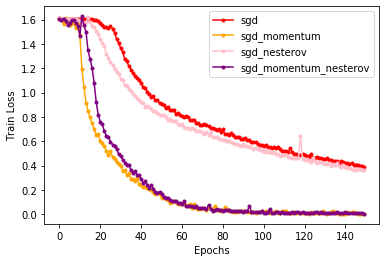

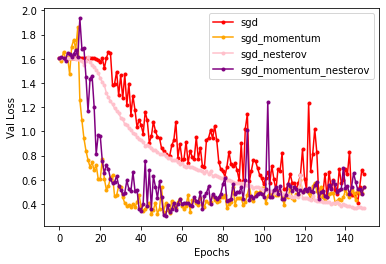

In [12]:
import matplotlib.pyplot as plt

#9 epoch-loss 그래프
# train data의 loss 그래프
train_loss_sgd = history_sgd.history['loss']
train_loss_sgd_momentum = history_sgd_momentum.history['loss']
train_loss_sgd_nesterov = history_sgd_nesterov.history['loss']
train_loss_sgd_momentum_nesterov = history_sgd_momentum_nesterov.history['loss']
x_len = range(150)
plt.plot(x_len, train_loss_sgd, marker='.', color='red', label='sgd')
plt.plot(x_len, train_loss_sgd_momentum, marker='.', color='orange', label='sgd_momentum')
plt.plot(x_len, train_loss_sgd_nesterov, marker='.', color='pink', label='sgd_nesterov')
plt.plot(x_len, train_loss_sgd_momentum_nesterov, marker='.', color='purple', label='sgd_momentum_nesterov')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Train Loss')
plt.show()
# validation data의 loss 그래프
val_loss_sgd = history_sgd.history['val_loss']
val_loss_sgd_momentum = history_sgd_momentum.history['val_loss']
val_loss_sgd_nesterov = history_sgd_nesterov.history['loss']
val_loss_sgd_momentum_nesterov = history_sgd_momentum_nesterov.history['val_loss']
plt.plot(x_len, val_loss_sgd, marker='.', color='red', label='sgd')
plt.plot(x_len, val_loss_sgd_momentum, marker='.', color='orange', label='sgd_momentum')
plt.plot(x_len, val_loss_sgd_nesterov, marker='.', color='pink', label='sgd_nesterov')
plt.plot(x_len, val_loss_sgd_momentum_nesterov, marker='.', color='purple', label='sgd_momentum_nesterov')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Val Loss')
plt.show()

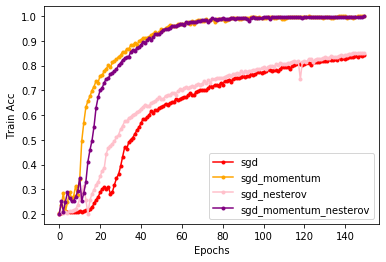

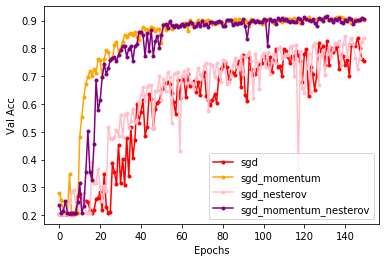

In [13]:
#10 epoch-accuracy 그래프
# train data의 accuracy 그래프
train_acc_sgd = history_sgd.history['accuracy']
train_acc_sgd_momentum = history_sgd_momentum.history['accuracy']
train_acc_sgd_nesterov = history_sgd_nesterov.history['accuracy']
train_acc_sgd_momentum_nesterov = history_sgd_momentum_nesterov.history['accuracy']
x_len = range(150)
plt.plot(x_len, train_acc_sgd, marker='.', color='red', label='sgd')
plt.plot(x_len, train_acc_sgd_momentum, marker='.', color='orange', label='sgd_momentum')
plt.plot(x_len, train_acc_sgd_nesterov, marker='.', color='pink', label='sgd_nesterov')
plt.plot(x_len, train_acc_sgd_momentum_nesterov, marker='.', color='purple', label='sgd_momentum_nesterov')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Train Acc')
plt.show()
# validation data의 accuracy 그래프
val_acc_sgd = history_sgd.history['val_accuracy']
val_acc_sgd_momentum = history_sgd_momentum.history['val_accuracy']
val_acc_sgd_nesterov = history_sgd_nesterov.history['val_accuracy']
val_acc_sgd_momentum_nesterov = history_sgd_momentum_nesterov.history['val_accuracy']
plt.plot(x_len, val_acc_sgd, marker='.', color='red', label='sgd')
plt.plot(x_len, val_acc_sgd_momentum, marker='.', color='orange', label='sgd_momentum')
plt.plot(x_len, val_acc_sgd_nesterov, marker='.', color='pink', label='sgd_nesterov')
plt.plot(x_len, val_acc_sgd_momentum_nesterov, marker='.', color='purple', label='sgd_momentum_nesterov')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Val Acc')
plt.show()